In [1]:
"""
Runs parity checker with regularization.
"""

"Runs parity checker with regularization.\n"

In [2]:
using Revise
includet("../codebase/mlp.jl")

using Knet, Plots, Statistics, LinearAlgebra, Random, .mlp

In [3]:
# parameters

In [34]:
n=12 # length of input bit array
xdim = n
h1=h2=h3=2*n # hidden layer sizes
ydim = 1 # output is the probability for even parity
nbatch = 100 # number of bit strings presented at each iteration
ntest = div(2^n,8) # keep 1/8-th as test set
niter = 9*10^4 # number of training iterations

90000

In [35]:
# NN parameters
w1 = Param(randn(h1,xdim))
b1 = Param(randn(h1))
w2 = Param(randn(h2,h1))
b2 = Param(randn(h2))
w3 = Param(randn(h3,h2))
b3 = Param(randn(h3))
w4 = Param(randn(1,h3))
b4 = Param(randn(1))
w = (w1,w2,w3,w4)
b = (b1,b2,b3,b4)

(P(Array{Float64,1}(24)), P(Array{Float64,1}(24)), P(Array{Float64,1}(24)), P(Array{Float64,1}(1)))

In [36]:
trainidx, testidx = mlp.gen_data(n, ntest)

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  4084, 4085, 4086, 4088, 4089, 4090, 4091, 4092, 4093, 4094], [515, 705, 1741, 2037, 2752, 754, 3182, 3534, 710, 536  …  153, 3083, 369, 168, 2081, 2029, 1603, 2283, 1420, 3309])

In [37]:
@time w, b, losstrn, losstst, rho = mlp.backprop(w, b, niter, trainidx, testidx, n, ntest, nbatch, (xdim, h1, h2, h3, ydim); LR = 0.1, λ= 0.001);

┣████████████████████┫ [100.00%, 90000/90000, 00:45/00:45, 1979.04i/s] 


 45.480203 seconds (102.33 M allocations: 38.713 GiB, 20.10% gc time)


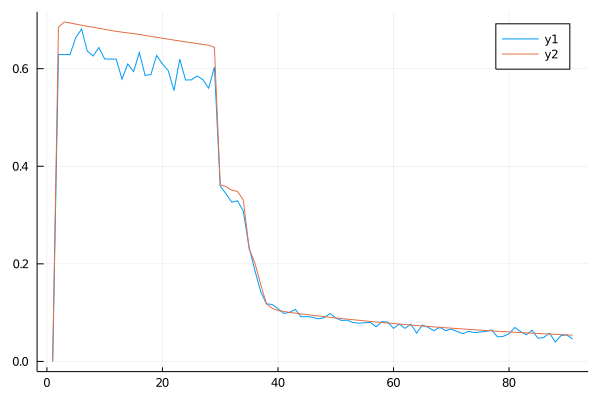

In [38]:
plot(losstrn)
plot!(losstst) 

In [39]:
xtrn, ytrn, xtst, ytst = mlp.split_data(trainidx, testidx, n, ntest)

([0 0 … 1 1; 0 0 … 1 1; … ; 0 1 … 0 1; 1 0 … 1 0], [1 1 … 1 1], [0 0 … 0 1; 0 0 … 1 1; … ; 1 0 … 0 0; 1 1 … 0 1], [1 0 … 1 0])

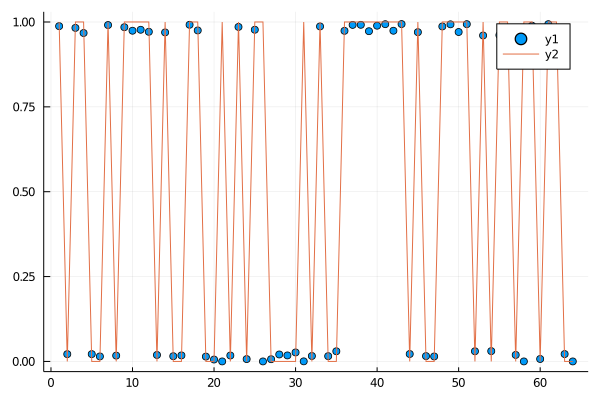

In [40]:
np=min(ntest,64)
scatter(pred(w,b,xtst)[1:np]
#    ,xlim=(0,np)
)
plot!(ytst[1:np])

In [41]:
# accuracy
function acc(x,y)
    cnt = 0
    tot = length(x[1,:])
    for i=1:tot-1
        chk = (pred(w,b,x[:,i])[1] - y[i][1])^2
        if (chk < 0.5)
            cnt += 1
        end
    end
    return 1.0*cnt/tot
end

trainidx, testidx = mlp.gen_data(n, ntest)
xtrn, ytrn, xtst, ytst = mlp.split_data(trainidx, testidx, n, ntest)

([0 0 … 1 1; 0 0 … 1 1; … ; 0 1 … 0 1; 1 0 … 1 0], [1 1 … 1 1], [0 0 … 0 1; 0 0 … 0 1; … ; 0 0 … 1 1; 1 0 … 1 1], [1 1 … 0 1])

In [42]:
acc(xtrn,ytrn),acc(xtst,ytst)

(0.9801842031816913, 0.98046875)

In [43]:
sumtrn = 0.0; sumtst = 0.0

for i=1:100
    trainidx, testidx = mlp.gen_data(n, ntest)
    xtrn, ytrn, xtst, ytst = mlp.split_data(trainidx, testidx, n, ntest)
    sumtrn += acc(xtrn,ytrn); sumtst += acc(xtst,ytst)
end

(sumtrn/100,sumtst/100) # (overfitted but works)

(0.9801814122243926, 0.9805078125)

In [44]:
# distribution of weights
histogram(reshape(w1,:,1)[:,1],normalize=:pdf)

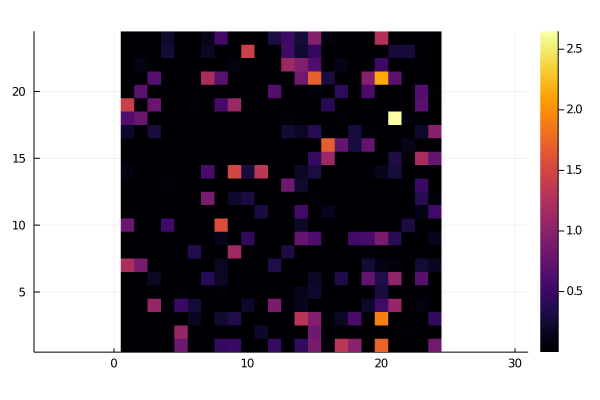

In [45]:
heatmap(abs.(value(w2)),aspect_ratio=1)

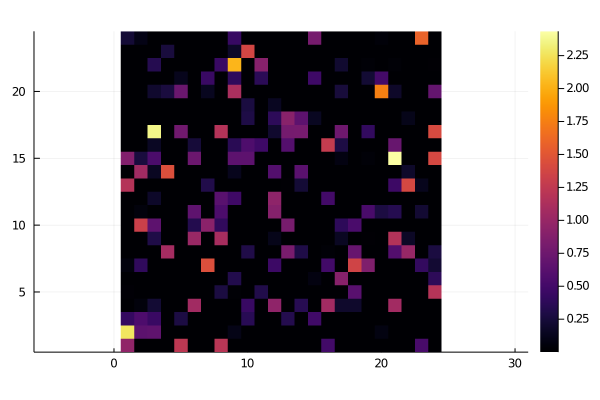

In [46]:
heatmap(abs.(value(w3)),aspect_ratio=1)

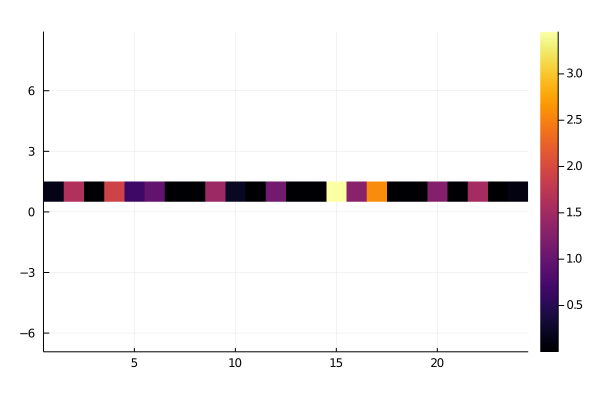

In [47]:
heatmap(abs.(value(w4)),aspect_ratio=1)

In [48]:
includet("../codebase/metrics.jl")
includet("../codebase/rewiring.jl")
using .metrics, .rewiring
A = computeKernel(w, (xdim, h1, h2, h3, ydim))
metrics.net_density(A)

0.10259103641456582